In [1]:
## ALl imports from scripts and packages
import pandas as pd
import matplotlib.pyplot as plt
from transform.cleaner import MovieDataCleaner
from transform.converter import json_to_dataframe
from extract.api import fetch_movies
from scripts.search import search_sci_fi, search_uma_by_tarantino
from scripts.kpi import (
    highest_budget,
    highest_profit,
    highest_rated,
    highest_revenue,
    highest_roi,
    lowest_profit,
    lowest_roi,
    lowest_rated,
    most_voted,
    most_popular,
    
    franchise_vs_standalone,
    most_successful_franchises,
    most_successful_directors    
)



Extract movies using the utility function in scripts directory

In [2]:
movie_ids =  [
        0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428,
        168259, 99861, 284054, 12445, 181808, 330457, 
        351286, 109445, 321612, 260513
    ]


movies = fetch_movies(movie_ids)
movies

2025-12-07 13:00:11,276 INFO extract.api - Fetching 19 movies...
2025-12-07 13:00:12,737 INFO extract.api - Completed fetch for 19 movies


{168259: {'adult': False,
  'backdrop_path': '/ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg',
  'belongs_to_collection': {'id': 9485,
   'name': 'The Fast and the Furious Collection',
   'poster_path': '/zOCnMPoUxgJK1RFPfN4PcnT16gr.jpg',
   'backdrop_path': '/z5A5W3WYJc3UVEWljSGwdjDgQ0j.jpg'},
  'budget': 190000000,
  'genres': [{'id': 28, 'name': 'Action'},
   {'id': 80, 'name': 'Crime'},
   {'id': 53, 'name': 'Thriller'}],
  'homepage': 'https://www.uphe.com/movies/furious-7',
  'id': 168259,
  'imdb_id': 'tt2820852',
  'origin_country': ['US'],
  'original_language': 'en',
  'original_title': 'Furious 7',
  'overview': 'Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother.',
  'popularity': 29.0959,
  'poster_path': '/ktofZ9Htrjiy0P6LEowsDaxd3Ri.jpg',
  'production_companies': [{'id': 333,
    'logo_path': '/5xUJfzPZ8jWJUDzYtIeuPO4qPIa.png',
    'name': 'Original Film',
    'origin_country': 'US'},
   {'id': 1225,
    'logo_path': '/rIxhJMR7oK8b2fMakmTfRLY2T

Convert the Extracted movies into Dataframes with columns 

In [3]:
df =json_to_dataframe(movies).T
df


adult                     backdrop_path  \
168259  False  /ehzI1mVcnHqB58NqPyQwpMqcVoz.jpg   
420818  False  /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg   
597     False  /xnHVX37XZEp33hhCbYlQFq7ux1J.jpg   
140607  False  /8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg   
135397  False  /dF6FjTZzRTENfB4R17HDN20jLT2.jpg   
299534  False  /9wXPKruA6bWYk2co5ix6fH59Qr8.jpg   
24428   False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg   
0        None                              None   
299536  False  /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg   
19995   False  /7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg   
330457  False  /AoSZyb37ljMAxw0RdeQEBHKtgcc.jpg   
12445   False  /cbcpDn6XJaIGoOil1bKuskU8ds4.jpg   
181808  False  /5Iw7zQTHVRBOYpA0V6z0yypOPZh.jpg   
109445  False  /u2bZhH3nTf0So0UIC1QxAqBvC07.jpg   
99861   False  /kIBK5SKwgqIIuRKhhWrJn3XkbPq.jpg   
284054  False  /AlFqBwJnokrp9zWTXOUv7uhkaeq.jpg   
321612  False  /uU1Mt4JWhDvl4vKb3AfxNsorkoM.jpg   
351286  False  /gBmrsugfWpiXRh13Vo3j0WW55qD.jpg   
260513  False  /mabuNsGJgRuCTuGqjFkWe1xdu19.jpg   

                                    belongs_to_collection     budget  \
168259  {'id': 9485, 'name': 'The Fast and the Furious...  190000000   
420818  {'id': 762512, 'name': 'The Lion King (Reboot)...  260000000   
597                                                  None  200000000   
140607  {'id': 10, 'name': 'Star Wars Collection', 'po...  245000000   
135397  {'id': 328, 'name': 'Jurassic Park Collection'...  150000000   
299534  {'id': 86311, 'name': 'The Avengers Collection...  356000000   
24428   {'id': 86311, 'name': 'The Avengers Collection...  220000000   
0                                                    None       None   
299536  {'id': 86311, 'name': 'The Avengers Collection...  300000000   
19995   {'id': 87096, 'name': 'Avatar Collection', 'po...  237000000   
330457  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
12445   {'id': 1241, 'name': 'Harry Potter Collection'...  125000000   
181808  {'id': 10, 'name': 'Star Wars Collection', 'po...  300000000   
109445  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
99861   {'id': 86311, 'name': 'The Avengers Collection...  235000000   
284054  {'id': 529892, 'name': 'Black Panther Collecti...  200000000   
321612                                               None  160000000   
351286  {'id': 328, 'name': 'Jurassic Park Collection'...  170000000   
260513  {'id': 468222, 'name': 'The Incredibles Collec...  200000000   

                                                   genres  \
168259  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
420818  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
597     [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
140607  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
135397  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
299534  [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...   
24428   [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
0                                                    None   
299536  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
19995   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
330457  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
12445   [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
181808  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
109445  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
99861   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
284054  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
321612  [{'id': 10751, 'name': 'Family'}, {'id': 14, '...   
351286  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
260513  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                                 homepage      id    imdb_id  \
168259              https://www.uphe.com/movies/furious-7  168259  tt2820852   
420818       https://movies.disney.com/the-lion-king-2019  420818  tt6105098   
597        https://www.paramountmovies.com/movies/titanic     597  tt0120338   
14060

In [4]:
df[
    df["genres"].str.contains("Science Fiction", case=False, na=False)
    & df["genres"].str.contains("Action", case=False, na=False)
][["title", "genres"]].head()


Empty DataFrame
Columns: [title, genres]
Index: []

Remove irrelevant columns ('adult', 'imdb_id', 'original_title', 'video', 'homepage')

In [5]:
cols_to_drop = ['adult', 'imdb_id', 'video', 'homepage', 'credits']

cleaner = MovieDataCleaner(df)
cleaned_df = cleaner.drop_irrelevant(cols_to_drop)

cleaned_df = cleaner.df
cleaned_df.head()
cleaned_df.columns.tolist()


['backdrop_path',
 'belongs_to_collection',
 'budget',
 'genres',
 'id',
 'origin_country',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'cast_size',
 'director',
 'crew_size']

Extract and Clean key data points

In [6]:
cleaner = MovieDataCleaner(df)
numeric_cols = ['budget', 'id', 'popularity', 'revenue'] 
date_cols = ["release_date"]

final_columns = [
    'id', 'title', 'tagline', 'release_date', 'genres',
    'belongs_to_collection', 'original_language',
    'budget_musd', 'revenue_musd',
    'production_companies', 'production_countries',
    'vote_count', 'vote_average', 'popularity', 'runtime',
    'overview', 'spoken_languages', 'poster_path',
    'cast', 'cast_size', 'director', 'crew_size'
]

cleaned_df = (cleaner
    .extract_single_json_column(column="belongs_to_collection", key="name")
    .pipe_names(["genres", "spoken_languages", "production_countries", "production_companies", 'cast'])
    .convert_dtypes(numeric_cols, date_cols)
    .replace_zero_with_nan(["budget", "revenue", "runtime"])
    .convert_to_millions(["budget", "revenue"])
    .fix_vote_count()
    .clean_text_placeholders(["overview", "tagline"])
    .remove_invalid_and_duplicated()
    .keep_min_non_null(10)
    .filter_and_drop()
    .select_final_columns(final_columns)
    .reset_index()
    
)
cleaned_df = cleaner.df 
cleaned_df




id                                         title  \
0   168259.0                                     Furious 7   
1   420818.0                                 The Lion King   
2      597.0                                       Titanic   
3   140607.0                  Star Wars: The Force Awakens   
4   135397.0                                Jurassic World   
5   299534.0                             Avengers: Endgame   
6    24428.0                                  The Avengers   
7   299536.0                        Avengers: Infinity War   
8    19995.0                                        Avatar   
9   330457.0                                     Frozen II   
10   12445.0  Harry Potter and the Deathly Hallows: Part 2   
11  181808.0                      Star Wars: The Last Jedi   
12  109445.0                                        Frozen   
13   99861.0                       Avengers: Age of Ultron   
14  284054.0                                 Black Panther   
15  321612.0                          Beauty and the Beast   
16  351286.0                Jurassic World: Fallen Kingdom   
17  260513.0                                 Incredibles 2   

                                              tagline release_date  \
0                                Vengeance hits home.   2015-04-01   
1                              The king has returned.   2019-07-12   
2           Nothing on earth could come between them.   1997-11-18   
3                       Every generation has a story.   2015-12-15   
4                                   The park is open.   2015-06-06   
5                                  Avenge the fallen.   2019-04-24   
6                             Some assembly required.   2012-04-25   
7                       Destiny arrives all the same.   2018-04-25   
8                         Enter the world of Pandora.   2009-12-15   
9                      The past is not what it seems.   2019-11-20   
10                                       It all ends.   2011-07-12   
11                                   Let the Past Die   2017-12-13   
12  Only the act of true love will thaw a frozen h...   2013-11-20   
13                                A new age has come.   2015-04-22   
14                                Long live the king.   2018-02-13   
15                                      Be our guest.   2017-03-16   
16                                  The park is gone.   2018-06-06   
17                      It's been too long, dahlings.   2018-06-14   

                                       genres  \
0                       Action|Crime|Thriller   
1            Adventure|Drama|Family|Animation   
2                               Drama|Romance   
3            Adventure|Action|Science Fiction   
4   Action|Adventure|Science Fiction|Thriller   
5            Adventure|Science Fiction|Action   
6            Science Fiction|Action|Adventure   
7            Adventure|Action|Science Fiction   
8    Action|Adventure|Fantasy|Science Fiction   
9   Family|Animation|Adventure|Comedy|Fantasy   
10                          Adventure|Fantasy   
11           Adventure|Action|Science Fiction   
12         Animation|Family|Adventure|Fantasy   
13           Action|Adventure|Science Fiction   
14           Action|Adventure|Science Fiction   
15                     Family|Fantasy|Romance   
16  Action|Adventure|Science Fiction|Thriller   
17          Action|Adventure|Animation|Family   

                  belongs_to_collection original_language  budget_musd  \
0   The Fast and the Furious Collection                en        190.0   
1     The Lion King (Reboot) Collection                en        260.0   
2                                  None                en        200.0   
3                  Star Wars Collection                en        245.0   
4              Jurassic Park Collection                en        150.0   
5               The Avengers Collection                en        356.0   
6               The Avengers Collection           

In [7]:
cleaned_df[cleaned_df["cast"].str.contains("Bruce Willis", case=False, na=False)][["title", "genres"]].head()


Empty DataFrame
Columns: [title, genres]
Index: []

KPI Implementation and Anaylis

Identify the Best/Worst Performing Movies


In [8]:
## Getting the highest revenue
highest_revenue_df = highest_revenue(cleaned_df)
highest_revenue_df

id                         title  \
8   19995.0                        Avatar   
5  299534.0             Avengers: Endgame   
2     597.0                       Titanic   
3  140607.0  Star Wars: The Force Awakens   
7  299536.0        Avengers: Infinity War   
4  135397.0                Jurassic World   
1  420818.0                 The Lion King   
6   24428.0                  The Avengers   
0  168259.0                     Furious 7   
9  330457.0                     Frozen II   

                                     tagline release_date  \
8                Enter the world of Pandora.   2009-12-15   
5                         Avenge the fallen.   2019-04-24   
2  Nothing on earth could come between them.   1997-11-18   
3              Every generation has a story.   2015-12-15   
7              Destiny arrives all the same.   2018-04-25   
4                          The park is open.   2015-06-06   
1                     The king has returned.   2019-07-12   
6                    Some assembly required.   2012-04-25   
0                       Vengeance hits home.   2015-04-01   
9             The past is not what it seems.   2019-11-20   

                                      genres  \
8   Action|Adventure|Fantasy|Science Fiction   
5           Adventure|Science Fiction|Action   
2                              Drama|Romance   
3           Adventure|Action|Science Fiction   
7           Adventure|Action|Science Fiction   
4  Action|Adventure|Science Fiction|Thriller   
1           Adventure|Drama|Family|Animation   
6           Science Fiction|Action|Adventure   
0                      Action|Crime|Thriller   
9  Family|Animation|Adventure|Comedy|Fantasy   

                 belongs_to_collection original_language  budget_musd  \
8                    Avatar Collection                en        237.0   
5              The Avengers Collection                en        356.0   
2                                 None                en        200.0   
3                 Star Wars Collection                en        245.0   
7              The Avengers Collection                en        300.0   
4             Jurassic Park Collection                en        150.0   
1    The Lion King (Reboot) Collection                en        260.0   
6              The Avengers Collection                en        220.0   
0  The Fast and the Furious Collection                en        190.0   
9                    Frozen Collection                en        150.0   

   revenue_musd                               production_companies  ...  \
8       2923.71  Dune Entertainment|Lightstorm Entertainment|20...  ...   
5       2799.44                                     Marvel Studios  ...   
2       2264.16  Paramount Pictures|20th Century Fox|Lightstorm...  ...   
3       2068.22                           Lucasfilm Ltd.|Bad Robot  ...   
7       2052.42                                     Marvel Studios  ...   
4       1671.54  Amblin Entertainment|Universal Pictures|Legend...  ...   
1       1662.02        Walt Disney Pictures|Fairview Entertainment  ...   
6       1518.82                                     Marvel Studios  ...   
0       1515.40          Original Film|One Race|Universal Pictures  ...   
9       1453.68                      Walt Disney Animation Studios  ...   

  vote_average popularity runtime  \
8        7.594    32.1020     162   
5        8.237    14.3290     181   
2        7.903    26.9381     194   
3        7.255     7.1475     136   
7        8.235    20.3123     149   
4        6.699     9.8352     124   
1        7.102     8.6660     118   
6        7.869    45.1896     143   
0          7.2    29.0959     139   
9        7.241     9.4454     103   

                                            overview  \
8  In the 22nd century, a paraplegic Marine is di...   
5  After the devastating events of Avengers: Infi...   
2  101-year-old Rose DeWitt Bukater tells the sto...   
3  Thirty years after defeating the Galactic Empi.

In [9]:
## Getting the highest budget
highest_budget = highest_budget(cleaned_df)
highest_budget


id                         title  \
5   299534.0             Avengers: Endgame   
7   299536.0        Avengers: Infinity War   
11  181808.0      Star Wars: The Last Jedi   
1   420818.0                 The Lion King   
3   140607.0  Star Wars: The Force Awakens   
8    19995.0                        Avatar   
13   99861.0       Avengers: Age of Ultron   
6    24428.0                  The Avengers   
17  260513.0                 Incredibles 2   
2      597.0                       Titanic   

                                      tagline release_date  \
5                          Avenge the fallen.   2019-04-24   
7               Destiny arrives all the same.   2018-04-25   
11                           Let the Past Die   2017-12-13   
1                      The king has returned.   2019-07-12   
3               Every generation has a story.   2015-12-15   
8                 Enter the world of Pandora.   2009-12-15   
13                        A new age has come.   2015-04-22   
6                     Some assembly required.   2012-04-25   
17              It's been too long, dahlings.   2018-06-14   
2   Nothing on earth could come between them.   1997-11-18   

                                      genres  \
5           Adventure|Science Fiction|Action   
7           Adventure|Action|Science Fiction   
11          Adventure|Action|Science Fiction   
1           Adventure|Drama|Family|Animation   
3           Adventure|Action|Science Fiction   
8   Action|Adventure|Fantasy|Science Fiction   
13          Action|Adventure|Science Fiction   
6           Science Fiction|Action|Adventure   
17         Action|Adventure|Animation|Family   
2                              Drama|Romance   

                belongs_to_collection original_language  budget_musd  \
5             The Avengers Collection                en        356.0   
7             The Avengers Collection                en        300.0   
11               Star Wars Collection                en        300.0   
1   The Lion King (Reboot) Collection                en        260.0   
3                Star Wars Collection                en        245.0   
8                   Avatar Collection                en        237.0   
13            The Avengers Collection                en        235.0   
6             The Avengers Collection                en        220.0   
17         The Incredibles Collection                en        200.0   
2                                None                en        200.0   

    revenue_musd                               production_companies  ...  \
5        2799.44                                     Marvel Studios  ...   
7        2052.42                                     Marvel Studios  ...   
11       1332.70                                     Lucasfilm Ltd.  ...   
1        1662.02        Walt Disney Pictures|Fairview Entertainment  ...   
3        2068.22                           Lucasfilm Ltd.|Bad Robot  ...   
8        2923.71  Dune Entertainment|Lightstorm Entertainment|20...  ...   
13       1405.40                                     Marvel Studios  ...   
6        1518.82                                     Marvel Studios  ...   
17       1243.23                                              Pixar  ...   
2        2264.16  Paramount Pictures|20th Century Fox|Lightstorm...  ...   

   vote_average popularity runtime  \
5         8.237    14.3290     181   
7         8.235    20.3123     149   
11          6.8     5.8878     152   
1         7.102     8.6660     118   
3         7.255     7.1475     136   
8         7.594    32.1020     162   
13        7.271    10.9382     141   
6         7.869    45.1896     143   
17        7.455     8.7764     118   
2         7.903    26.9381     194   

                                             overview  \
5   After the devastating events of Avengers: Infi...   
7   As the Avengers and their allies have continue...   
11  Rey develops her newly discovered abilities wi...   
1   Simba idol

In [10]:
## Getting the highest profit
highest_profit =  highest_profit(cleaned_df)
highest_profit

id                         title  \
8   19995.0                        Avatar   
5  299534.0             Avengers: Endgame   
2     597.0                       Titanic   
3  140607.0  Star Wars: The Force Awakens   
7  299536.0        Avengers: Infinity War   
4  135397.0                Jurassic World   
1  420818.0                 The Lion King   
0  168259.0                     Furious 7   
9  330457.0                     Frozen II   
6   24428.0                  The Avengers   

                                     tagline release_date  \
8                Enter the world of Pandora.   2009-12-15   
5                         Avenge the fallen.   2019-04-24   
2  Nothing on earth could come between them.   1997-11-18   
3              Every generation has a story.   2015-12-15   
7              Destiny arrives all the same.   2018-04-25   
4                          The park is open.   2015-06-06   
1                     The king has returned.   2019-07-12   
0                       Vengeance hits home.   2015-04-01   
9             The past is not what it seems.   2019-11-20   
6                    Some assembly required.   2012-04-25   

                                      genres  \
8   Action|Adventure|Fantasy|Science Fiction   
5           Adventure|Science Fiction|Action   
2                              Drama|Romance   
3           Adventure|Action|Science Fiction   
7           Adventure|Action|Science Fiction   
4  Action|Adventure|Science Fiction|Thriller   
1           Adventure|Drama|Family|Animation   
0                      Action|Crime|Thriller   
9  Family|Animation|Adventure|Comedy|Fantasy   
6           Science Fiction|Action|Adventure   

                 belongs_to_collection original_language  budget_musd  \
8                    Avatar Collection                en        237.0   
5              The Avengers Collection                en        356.0   
2                                 None                en        200.0   
3                 Star Wars Collection                en        245.0   
7              The Avengers Collection                en        300.0   
4             Jurassic Park Collection                en        150.0   
1    The Lion King (Reboot) Collection                en        260.0   
0  The Fast and the Furious Collection                en        190.0   
9                    Frozen Collection                en        150.0   
6              The Avengers Collection                en        220.0   

   revenue_musd                               production_companies  ...  \
8       2923.71  Dune Entertainment|Lightstorm Entertainment|20...  ...   
5       2799.44                                     Marvel Studios  ...   
2       2264.16  Paramount Pictures|20th Century Fox|Lightstorm...  ...   
3       2068.22                           Lucasfilm Ltd.|Bad Robot  ...   
7       2052.42                                     Marvel Studios  ...   
4       1671.54  Amblin Entertainment|Universal Pictures|Legend...  ...   
1       1662.02        Walt Disney Pictures|Fairview Entertainment  ...   
0       1515.40          Original Film|One Race|Universal Pictures  ...   
9       1453.68                      Walt Disney Animation Studios  ...   
6       1518.82                                     Marvel Studios  ...   

  popularity runtime                                           overview  \
8    32.1020     162  In the 22nd century, a paraplegic Marine is di...   
5    14.3290     181  After the devastating events of Avengers: Infi...   
2    26.9381     194  101-year-old Rose DeWitt Bukater tells the sto...   
3     7.1475     136  Thirty years after defeating the Galactic Empi...   
7    20.3123     149  As the Avengers and their allies have continue...   
4     9.8352     124  Twenty-two years after the events of Jurassic ...   
1     8.6660     118  Simba idolizes his father, King Mufasa, and ta...   
0    29.0959     139  Deckard Shaw seeks revenge against Dominic Tor...   
9     9

In [11]:
## Getting the lowest profit
lowest_profit =  lowest_profit(cleaned_df)
lowest_profit

id                                         title  \
11  181808.0                      Star Wars: The Last Jedi   
17  260513.0                                 Incredibles 2   
15  321612.0                          Beauty and the Beast   
12  109445.0                                        Frozen   
16  351286.0                Jurassic World: Fallen Kingdom   
14  284054.0                                 Black Panther   
13   99861.0                       Avengers: Age of Ultron   
10   12445.0  Harry Potter and the Deathly Hallows: Part 2   
6    24428.0                                  The Avengers   
9   330457.0                                     Frozen II   

                                              tagline release_date  \
11                                   Let the Past Die   2017-12-13   
17                      It's been too long, dahlings.   2018-06-14   
15                                      Be our guest.   2017-03-16   
12  Only the act of true love will thaw a frozen h...   2013-11-20   
16                                  The park is gone.   2018-06-06   
14                                Long live the king.   2018-02-13   
13                                A new age has come.   2015-04-22   
10                                       It all ends.   2011-07-12   
6                             Some assembly required.   2012-04-25   
9                      The past is not what it seems.   2019-11-20   

                                       genres       belongs_to_collection  \
11           Adventure|Action|Science Fiction        Star Wars Collection   
17          Action|Adventure|Animation|Family  The Incredibles Collection   
15                     Family|Fantasy|Romance                        None   
12         Animation|Family|Adventure|Fantasy           Frozen Collection   
16  Action|Adventure|Science Fiction|Thriller    Jurassic Park Collection   
14           Action|Adventure|Science Fiction    Black Panther Collection   
13           Action|Adventure|Science Fiction     The Avengers Collection   
10                          Adventure|Fantasy     Harry Potter Collection   
6            Science Fiction|Action|Adventure     The Avengers Collection   
9   Family|Animation|Adventure|Comedy|Fantasy           Frozen Collection   

   original_language  budget_musd  revenue_musd  \
11                en        300.0       1332.70   
17                en        200.0       1243.23   
15                en        160.0       1266.12   
12                en        150.0       1274.22   
16                en        170.0       1310.47   
14                en        200.0       1349.93   
13                en        235.0       1405.40   
10                en        125.0       1341.51   
6                 en        220.0       1518.82   
9                 en        150.0       1453.68   

                       production_companies  ... popularity runtime  \
11                           Lucasfilm Ltd.  ...     5.8878     152   
17                                    Pixar  ...     8.7764     118   
15    Walt Disney Pictures|Mandeville Films  ...    11.1129     129   
12            Walt Disney Animation Studios  ...    17.8150     102   
16  Amblin Entertainment|Universal Pictures  ...     8.2567     129   
14                           Marvel Studios  ...     8.2880     135   
13                           Marvel Studios  ...    10.9382     141   
10       Warner Bros. Pictures|Heyday Films  ...    15.4339     130   
6                            Marvel Studios  ...    45.1896     143   
9             Walt Disney Animation Studios  ...     9.4454     103   

                                             overview  \
11  Rey develops her newly discovered abilities wi...   
17  Elastigirl springs into action to save the day...   
15  A live-action adaptation of Disney's version o...   
12  Young princess Anna of Arendelle dreams about ...   
16  Three years after Jurassic World was destroyed...   
14  King T'Challa retu

In [12]:
## Getting the highest roi
highest_roi =  highest_roi(cleaned_df)
highest_roi

id                                         title  \
1    19995.0                                        Avatar   
4      597.0                                       Titanic   
5   135397.0                                Jurassic World   
11   12445.0  Harry Potter and the Deathly Hallows: Part 2   
13  330457.0                                     Frozen II   
15  109445.0                                        Frozen   
2   140607.0                  Star Wars: The Force Awakens   
8   168259.0                                     Furious 7   
16  321612.0                          Beauty and the Beast   
0   299534.0                             Avengers: Endgame   

                                              tagline release_date  \
1                         Enter the world of Pandora.   2009-12-15   
4           Nothing on earth could come between them.   1997-11-18   
5                                   The park is open.   2015-06-06   
11                                       It all ends.   2011-07-12   
13                     The past is not what it seems.   2019-11-20   
15  Only the act of true love will thaw a frozen h...   2013-11-20   
2                       Every generation has a story.   2015-12-15   
8                                Vengeance hits home.   2015-04-01   
16                                      Be our guest.   2017-03-16   
0                                  Avenge the fallen.   2019-04-24   

                                       genres  \
1    Action|Adventure|Fantasy|Science Fiction   
4                               Drama|Romance   
5   Action|Adventure|Science Fiction|Thriller   
11                          Adventure|Fantasy   
13  Family|Animation|Adventure|Comedy|Fantasy   
15         Animation|Family|Adventure|Fantasy   
2            Adventure|Action|Science Fiction   
8                       Action|Crime|Thriller   
16                     Family|Fantasy|Romance   
0            Adventure|Science Fiction|Action   

                  belongs_to_collection original_language  budget_musd  \
1                     Avatar Collection                en        237.0   
4                                  None                en        200.0   
5              Jurassic Park Collection                en        150.0   
11              Harry Potter Collection                en        125.0   
13                    Frozen Collection                en        150.0   
15                    Frozen Collection                en        150.0   
2                  Star Wars Collection                en        245.0   
8   The Fast and the Furious Collection                en        190.0   
16                                 None                en        160.0   
0               The Avengers Collection                en        356.0   

    revenue_musd                               production_companies  ...  \
1        2923.71  Dune Entertainment|Lightstorm Entertainment|20...  ...   
4        2264.16  Paramount Pictures|20th Century Fox|Lightstorm...  ...   
5        1671.54  Amblin Entertainment|Universal Pictures|Legend...  ...   
11       1341.51                 Warner Bros. Pictures|Heyday Films  ...   
13       1453.68                      Walt Disney Animation Studios  ...   
15       1274.22                      Walt Disney Animation Studios  ...   
2        2068.22                           Lucasfilm Ltd.|Bad Robot  ...   
8        1515.40          Original Film|One Race|Universal Pictures  ...   
16       1266.12              Walt Disney Pictures|Mandeville Films  ...   
0        2799.44                                     Marvel Studios  ...   

   popularity runtime                                           overview  \
1     32.1020     162  In the 22nd century, a paraplegic Marine is di...   
4     26.9381     194  101-year-old Rose DeWitt Bukater tells the sto...   
5      9.8352     124  Twenty-two years after the events of Jurassic ...   
11    15.4339     130  Harry, Ron and Hermione continue thei

In [13]:
## Getting lowest roi
lowest_roi =  lowest_roi(cleaned_df)
lowest_roi

id                           title                        tagline  \
12  181808.0        Star Wars: The Last Jedi               Let the Past Die   
9    99861.0         Avengers: Age of Ultron            A new age has come.   
17  260513.0                   Incredibles 2  It's been too long, dahlings.   
6   420818.0                   The Lion King         The king has returned.   
10  284054.0                   Black Panther            Long live the king.   
3   299536.0          Avengers: Infinity War  Destiny arrives all the same.   
7    24428.0                    The Avengers        Some assembly required.   
14  351286.0  Jurassic World: Fallen Kingdom              The park is gone.   
0   299534.0               Avengers: Endgame             Avenge the fallen.   
16  321612.0            Beauty and the Beast                  Be our guest.   

   release_date                                     genres  \
12   2017-12-13           Adventure|Action|Science Fiction   
9    2015-04-22           Action|Adventure|Science Fiction   
17   2018-06-14          Action|Adventure|Animation|Family   
6    2019-07-12           Adventure|Drama|Family|Animation   
10   2018-02-13           Action|Adventure|Science Fiction   
3    2018-04-25           Adventure|Action|Science Fiction   
7    2012-04-25           Science Fiction|Action|Adventure   
14   2018-06-06  Action|Adventure|Science Fiction|Thriller   
0    2019-04-24           Adventure|Science Fiction|Action   
16   2017-03-16                     Family|Fantasy|Romance   

                belongs_to_collection original_language  budget_musd  \
12               Star Wars Collection                en        300.0   
9             The Avengers Collection                en        235.0   
17         The Incredibles Collection                en        200.0   
6   The Lion King (Reboot) Collection                en        260.0   
10           Black Panther Collection                en        200.0   
3             The Avengers Collection                en        300.0   
7             The Avengers Collection                en        220.0   
14           Jurassic Park Collection                en        170.0   
0             The Avengers Collection                en        356.0   
16                               None                en        160.0   

    revenue_musd                         production_companies  ... popularity  \
12       1332.70                               Lucasfilm Ltd.  ...     5.8878   
9        1405.40                               Marvel Studios  ...    10.9382   
17       1243.23                                        Pixar  ...     8.7764   
6        1662.02  Walt Disney Pictures|Fairview Entertainment  ...     8.6660   
10       1349.93                               Marvel Studios  ...     8.2880   
3        2052.42                               Marvel Studios  ...    20.3123   
7        1518.82                               Marvel Studios  ...    45.1896   
14       1310.47      Amblin Entertainment|Universal Pictures  ...     8.2567   
0        2799.44                               Marvel Studios  ...    14.3290   
16       1266.12        Walt Disney Pictures|Mandeville Films  ...    11.1129   

   runtime                                           overview  \
12     152  Rey develops her newly discovered abilities wi...   
9      141  When Tony Stark tries to jumpstart a dormant p...   
17     118  Elastigirl springs into action to save the day...   
6      118  Simba idolizes his father, King Mufasa, and ta...   
10     135  King T'Challa returns home to the reclusive, t...   
3      149  As the Avengers and their allies have continue...   
7      143  When an unexpected enemy emerges and threatens...   
14     129  Three years after Jurassic World was destroyed...   
0      181  After the devastating events of Avengers: Infi...   
16     129  A live-action adaptation of Disney's version o...   

              spoken_languages                       pos

In [14]:
## Getting most voted movies
most_voted_movies = most_voted(cleaned_df)
most_voted_movies

id                                         title  \
7    24428.0                                  The Avengers   
1    19995.0                                        Avatar   
3   299536.0                        Avengers: Infinity War   
0   299534.0                             Avengers: Endgame   
4      597.0                                       Titanic   
9    99861.0                       Avengers: Age of Ultron   
10  284054.0                                 Black Panther   
11   12445.0  Harry Potter and the Deathly Hallows: Part 2   
5   135397.0                                Jurassic World   
2   140607.0                  Star Wars: The Force Awakens   

                                      tagline release_date  \
7                     Some assembly required.   2012-04-25   
1                 Enter the world of Pandora.   2009-12-15   
3               Destiny arrives all the same.   2018-04-25   
0                          Avenge the fallen.   2019-04-24   
4   Nothing on earth could come between them.   1997-11-18   
9                         A new age has come.   2015-04-22   
10                        Long live the king.   2018-02-13   
11                               It all ends.   2011-07-12   
5                           The park is open.   2015-06-06   
2               Every generation has a story.   2015-12-15   

                                       genres     belongs_to_collection  \
7            Science Fiction|Action|Adventure   The Avengers Collection   
1    Action|Adventure|Fantasy|Science Fiction         Avatar Collection   
3            Adventure|Action|Science Fiction   The Avengers Collection   
0            Adventure|Science Fiction|Action   The Avengers Collection   
4                               Drama|Romance                      None   
9            Action|Adventure|Science Fiction   The Avengers Collection   
10           Action|Adventure|Science Fiction  Black Panther Collection   
11                          Adventure|Fantasy   Harry Potter Collection   
5   Action|Adventure|Science Fiction|Thriller  Jurassic Park Collection   
2            Adventure|Action|Science Fiction      Star Wars Collection   

   original_language  budget_musd  revenue_musd  \
7                 en        220.0       1518.82   
1                 en        237.0       2923.71   
3                 en        300.0       2052.42   
0                 en        356.0       2799.44   
4                 en        200.0       2264.16   
9                 en        235.0       1405.40   
10                en        200.0       1349.93   
11                en        125.0       1341.51   
5                 en        150.0       1671.54   
2                 en        245.0       2068.22   

                                 production_companies  ... vote_average  \
7                                      Marvel Studios  ...        7.869   
1   Dune Entertainment|Lightstorm Entertainment|20...  ...        7.594   
3                                      Marvel Studios  ...        8.235   
0                                      Marvel Studios  ...        8.237   
4   Paramount Pictures|20th Century Fox|Lightstorm...  ...        7.903   
9                                      Marvel Studios  ...        7.271   
10                                     Marvel Studios  ...        7.366   
11                 Warner Bros. Pictures|Heyday Films  ...        8.084   
5   Amblin Entertainment|Universal Pictures|Legend...  ...        6.699   
2                            Lucasfilm Ltd.|Bad Robot  ...        7.255   

   popularity runtime                                           overview  \
7     45.1896     143  When an unexpected enemy emerges and threatens...   
1     32.1020     162  In the 22nd century, a paraplegic Marine is di...   
3     20.3123     149  As the Avengers and their allies have continue...   
0     14.3290     181  After the devastating events of Avengers: Infi...   
4     26.9381     194  101-year-old Rose DeWitt Bu

In [15]:
## Getting highest rated movies
highest_rated_movies = highest_rated(cleaned_df)
highest_rated_movies

id                                         title  \
0   299534.0                             Avengers: Endgame   
3   299536.0                        Avengers: Infinity War   
11   12445.0  Harry Potter and the Deathly Hallows: Part 2   
4      597.0                                       Titanic   
7    24428.0                                  The Avengers   
1    19995.0                                        Avatar   
17  260513.0                                 Incredibles 2   
10  284054.0                                 Black Panther   
9    99861.0                       Avengers: Age of Ultron   
2   140607.0                  Star Wars: The Force Awakens   

                                      tagline release_date  \
0                          Avenge the fallen.   2019-04-24   
3               Destiny arrives all the same.   2018-04-25   
11                               It all ends.   2011-07-12   
4   Nothing on earth could come between them.   1997-11-18   
7                     Some assembly required.   2012-04-25   
1                 Enter the world of Pandora.   2009-12-15   
17              It's been too long, dahlings.   2018-06-14   
10                        Long live the king.   2018-02-13   
9                         A new age has come.   2015-04-22   
2               Every generation has a story.   2015-12-15   

                                      genres       belongs_to_collection  \
0           Adventure|Science Fiction|Action     The Avengers Collection   
3           Adventure|Action|Science Fiction     The Avengers Collection   
11                         Adventure|Fantasy     Harry Potter Collection   
4                              Drama|Romance                        None   
7           Science Fiction|Action|Adventure     The Avengers Collection   
1   Action|Adventure|Fantasy|Science Fiction           Avatar Collection   
17         Action|Adventure|Animation|Family  The Incredibles Collection   
10          Action|Adventure|Science Fiction    Black Panther Collection   
9           Action|Adventure|Science Fiction     The Avengers Collection   
2           Adventure|Action|Science Fiction        Star Wars Collection   

   original_language  budget_musd  revenue_musd  \
0                 en        356.0       2799.44   
3                 en        300.0       2052.42   
11                en        125.0       1341.51   
4                 en        200.0       2264.16   
7                 en        220.0       1518.82   
1                 en        237.0       2923.71   
17                en        200.0       1243.23   
10                en        200.0       1349.93   
9                 en        235.0       1405.40   
2                 en        245.0       2068.22   

                                 production_companies  ... vote_average  \
0                                      Marvel Studios  ...        8.237   
3                                      Marvel Studios  ...        8.235   
11                 Warner Bros. Pictures|Heyday Films  ...        8.084   
4   Paramount Pictures|20th Century Fox|Lightstorm...  ...        7.903   
7                                      Marvel Studios  ...        7.869   
1   Dune Entertainment|Lightstorm Entertainment|20...  ...        7.594   
17                                              Pixar  ...        7.455   
10                                     Marvel Studios  ...        7.366   
9                                      Marvel Studios  ...        7.271   
2                            Lucasfilm Ltd.|Bad Robot  ...        7.255   

   popularity runtime                                           overview  \
0     14.3290     181  After the devastating events of Avengers: Infi...   
3     20.3123     149  As the Avengers and their allies have continue...   
11    15.4339     130  Harry, Ron and Hermione continue their quest t...   
4     26.9381     194  101-year-old Rose DeWitt Bukater tells the sto...   
7     45.1896     143  When an unexpect

In [16]:
## Getting lowest rated movies
lowest_rated_movies  = lowest_rated(cleaned_df)
lowest_rated_movies

id                           title  \
14  351286.0  Jurassic World: Fallen Kingdom   
5   135397.0                  Jurassic World   
12  181808.0        Star Wars: The Last Jedi   
16  321612.0            Beauty and the Beast   
6   420818.0                   The Lion King   
8   168259.0                       Furious 7   
15  109445.0                          Frozen   
13  330457.0                       Frozen II   
2   140607.0    Star Wars: The Force Awakens   
9    99861.0         Avengers: Age of Ultron   

                                              tagline release_date  \
14                                  The park is gone.   2018-06-06   
5                                   The park is open.   2015-06-06   
12                                   Let the Past Die   2017-12-13   
16                                      Be our guest.   2017-03-16   
6                              The king has returned.   2019-07-12   
8                                Vengeance hits home.   2015-04-01   
15  Only the act of true love will thaw a frozen h...   2013-11-20   
13                     The past is not what it seems.   2019-11-20   
2                       Every generation has a story.   2015-12-15   
9                                 A new age has come.   2015-04-22   

                                       genres  \
14  Action|Adventure|Science Fiction|Thriller   
5   Action|Adventure|Science Fiction|Thriller   
12           Adventure|Action|Science Fiction   
16                     Family|Fantasy|Romance   
6            Adventure|Drama|Family|Animation   
8                       Action|Crime|Thriller   
15         Animation|Family|Adventure|Fantasy   
13  Family|Animation|Adventure|Comedy|Fantasy   
2            Adventure|Action|Science Fiction   
9            Action|Adventure|Science Fiction   

                  belongs_to_collection original_language  budget_musd  \
14             Jurassic Park Collection                en        170.0   
5              Jurassic Park Collection                en        150.0   
12                 Star Wars Collection                en        300.0   
16                                 None                en        160.0   
6     The Lion King (Reboot) Collection                en        260.0   
8   The Fast and the Furious Collection                en        190.0   
15                    Frozen Collection                en        150.0   
13                    Frozen Collection                en        150.0   
2                  Star Wars Collection                en        245.0   
9               The Avengers Collection                en        235.0   

    revenue_musd                               production_companies  ...  \
14       1310.47            Amblin Entertainment|Universal Pictures  ...   
5        1671.54  Amblin Entertainment|Universal Pictures|Legend...  ...   
12       1332.70                                     Lucasfilm Ltd.  ...   
16       1266.12              Walt Disney Pictures|Mandeville Films  ...   
6        1662.02        Walt Disney Pictures|Fairview Entertainment  ...   
8        1515.40          Original Film|One Race|Universal Pictures  ...   
15       1274.22                      Walt Disney Animation Studios  ...   
13       1453.68                      Walt Disney Animation Studios  ...   
2        2068.22                           Lucasfilm Ltd.|Bad Robot  ...   
9        1405.40                                     Marvel Studios  ...   

   vote_average popularity runtime  \
14        6.537     8.2567     129   
5         6.699     9.8352     124   
12          6.8     5.8878     152   
16        6.969    11.1129     129   
6         7.102     8.6660     118   
8           7.2    29.0959     139   
15          7.2    17.8150     102   
13        7.241     9.4454     103   
2         7.255     7.1475     136   
9         7.271    10.9382     141   

                                             overview  \
14  Three years after Jurassic World was d

In [17]:
## Getting most popular movies
most_popular_movies = most_popular(cleaned_df)
most_popular_movies

id                                         title  \
7    24428.0                                  The Avengers   
1    19995.0                                        Avatar   
8   168259.0                                     Furious 7   
4      597.0                                       Titanic   
3   299536.0                        Avengers: Infinity War   
15  109445.0                                        Frozen   
11   12445.0  Harry Potter and the Deathly Hallows: Part 2   
0   299534.0                             Avengers: Endgame   
16  321612.0                          Beauty and the Beast   
9    99861.0                       Avengers: Age of Ultron   

                                              tagline release_date  \
7                             Some assembly required.   2012-04-25   
1                         Enter the world of Pandora.   2009-12-15   
8                                Vengeance hits home.   2015-04-01   
4           Nothing on earth could come between them.   1997-11-18   
3                       Destiny arrives all the same.   2018-04-25   
15  Only the act of true love will thaw a frozen h...   2013-11-20   
11                                       It all ends.   2011-07-12   
0                                  Avenge the fallen.   2019-04-24   
16                                      Be our guest.   2017-03-16   
9                                 A new age has come.   2015-04-22   

                                      genres  \
7           Science Fiction|Action|Adventure   
1   Action|Adventure|Fantasy|Science Fiction   
8                      Action|Crime|Thriller   
4                              Drama|Romance   
3           Adventure|Action|Science Fiction   
15        Animation|Family|Adventure|Fantasy   
11                         Adventure|Fantasy   
0           Adventure|Science Fiction|Action   
16                    Family|Fantasy|Romance   
9           Action|Adventure|Science Fiction   

                  belongs_to_collection original_language  budget_musd  \
7               The Avengers Collection                en        220.0   
1                     Avatar Collection                en        237.0   
8   The Fast and the Furious Collection                en        190.0   
4                                  None                en        200.0   
3               The Avengers Collection                en        300.0   
15                    Frozen Collection                en        150.0   
11              Harry Potter Collection                en        125.0   
0               The Avengers Collection                en        356.0   
16                                 None                en        160.0   
9               The Avengers Collection                en        235.0   

    revenue_musd                               production_companies  ...  \
7        1518.82                                     Marvel Studios  ...   
1        2923.71  Dune Entertainment|Lightstorm Entertainment|20...  ...   
8        1515.40          Original Film|One Race|Universal Pictures  ...   
4        2264.16  Paramount Pictures|20th Century Fox|Lightstorm...  ...   
3        2052.42                                     Marvel Studios  ...   
15       1274.22                      Walt Disney Animation Studios  ...   
11       1341.51                 Warner Bros. Pictures|Heyday Films  ...   
0        2799.44                                     Marvel Studios  ...   
16       1266.12              Walt Disney Pictures|Mandeville Films  ...   
9        1405.40                                     Marvel Studios  ...   

   vote_average popularity runtime  \
7         7.869    45.1896     143   
1         7.594    32.1020     162   
8           7.2    29.0959     139   
4         7.903    26.9381     194   
3         8.235    20.3123     149   
15          7.2    17.8150     102   
11        8.084    15.4339     130   
0         8.237    14.3290     181   
16        6.969    11.1129     12

Advanced Movie Filtering and Search Queries for Sci-Fi Movies and Movies starring Uma Thurman

In [18]:
## Searching for the best-rated Science Fiction Action movies starring Bruce Willis (sorted by Rating - highest to lowest)
search_bruce_willis_df = search_sci_fi(cleaned_df)
search_bruce_willis_df

Empty DataFrame
Columns: [id, title, tagline, release_date, genres, belongs_to_collection, original_language, budget_musd, revenue_musd, production_companies, production_countries, vote_count, vote_average, popularity, runtime, overview, spoken_languages, poster_path, cast, cast_size, director, crew_size]
Index: []

[0 rows x 22 columns]

In [19]:
search_uma_quentin_df = search_uma_by_tarantino(cleaned_df)
search_uma_quentin_df

Empty DataFrame
Columns: [id, title, tagline, release_date, genres, belongs_to_collection, original_language, budget_musd, revenue_musd, production_companies, production_countries, vote_count, vote_average, popularity, runtime, overview, spoken_languages, poster_path, cast, cast_size, director, crew_size]
Index: []

[0 rows x 22 columns]

Franchise vs. Standalone Movie Performance

In [20]:
''' 
Comparing movie franchises vs. standalone movies 
in terms of Mean Revenue, Median ROI, Mean Budget Raised, Mean Popularity Mean Rating
'''
franchise_stats = franchise_vs_standalone(cleaned_df)
franchise_stats

mean_revenue  median_roi  mean_budget  mean_popularity mean_rating
Standalone   1765.140000    9.617025        180.0        19.025500       7.436
Franchise    1682.669375    7.786121        218.0        15.719931    7.384063

In [12]:

"""
Find the most Successfult Movie Franchises based on the 
Total number of movies in franchise
Total & Mean Budget
Total & Mean Revenue
Mean Rating
"""

franchise_success = most_successful_franchises(cleaned_df)
franchise_success

movie_count  total_budget  mean_budget  \
belongs_to_collection                                                         
The Avengers Collection                        4        1111.0       277.75   
Star Wars Collection                           2         545.0       272.50   
Jurassic Park Collection                       2         320.0       160.00   
Avatar Collection                              1         237.0       237.00   
Frozen Collection                              2         300.0       150.00   
The Lion King (Reboot) Collection              1         260.0       260.00   
The Fast and the Furious Collection            1         190.0       190.00   
Black Panther Collection                       1         200.0       200.00   
Harry Potter Collection                        1         125.0       125.00   
The Incredibles Collection                     1         200.0       200.00   

                                     total_revenue  mean_revenue mean_rating  
belongs_to_collection                                                         
The Avengers Collection                    7776.08      1944.020       7.903  
Star Wars Collection                       3400.92      1700.460      7.0275  
Jurassic Park Collection                   2982.01      1491.005       6.618  
Avatar Collection                          2923.71      2923.710       7.594  
Frozen Collection                          2727.90      1363.950      7.2205  
The Lion King (Reboot) Collection          1662.02      1662.020       7.102  
The Fast and the Furious Collection        1515.40      1515.400         7.2  
Black Panther Collection                   1349.93      1349.930       7.366  
Harry Potter Collection                    1341.51      1341.510       8.084  
The Incredibles Collection                 1243.23      1243.230       7.455

In [13]:

"""
Find the most successful DIrectors based on the 
Total Number of Movies Directed
Total Revenue
Mean Rating

"""

director_success = most_successful_directors(cleaned_df)
director_success

movie_count  total_revenue mean_rating
director                                               
James Cameron              2        5187.87      7.7485
Joss Whedon                2        2924.22        7.57
Anthony Russo              1        2799.44       8.237
J.J. Abrams                1        2068.22       7.255
Joe Russo                  1        2052.42       8.235
Colin Trevorrow            1        1671.54       6.699
Jon Favreau                1        1662.02       7.102
James Wan                  1        1515.40         7.2
Jennifer Lee               1        1453.68       7.241
Ryan Coogler               1        1349.93       7.366
David Yates                1        1341.51       8.084
Rian Johnson               1        1332.70         6.8
J.A. Bayona                1        1310.47       6.537
Chris Buck                 1        1274.22         7.2
Bill Condon                1        1266.12       6.969
Brad Bird                  1        1243.23       7.455

Data Visualization

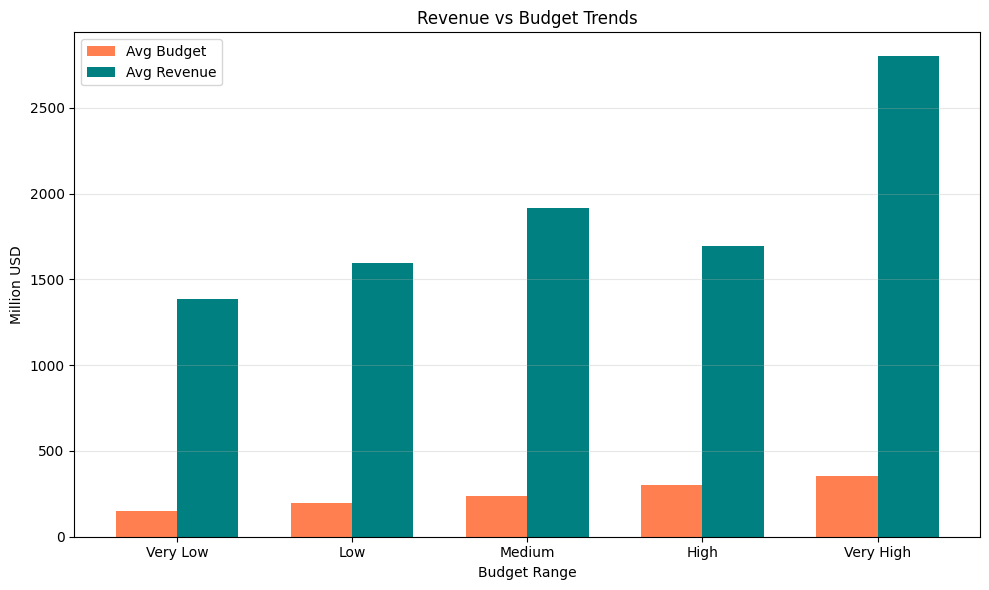

In [15]:
## Budget vs Budget Trends
temp = cleaned_df.dropna(subset=['budget_musd', 'revenue_musd']).copy()
temp['budget_range'] = pd.cut(temp['budget_musd'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

budget_comparison = temp.groupby('budget_range', observed=True).agg({
    'budget_musd': 'mean',
    'revenue_musd': 'mean'
}).reset_index()

x = range(len(budget_comparison))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar([i - width/2 for i in x], budget_comparison['budget_musd'], width, label='Avg Budget', color='coral')
ax.bar([i + width/2 for i in x], budget_comparison['revenue_musd'], width, label='Avg Revenue', color='teal')

ax.set_xlabel('Budget Range')
ax.set_ylabel('Million USD')
ax.set_title('Revenue vs Budget Trends')
ax.set_xticks(x)
ax.set_xticklabels(budget_comparison['budget_range'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

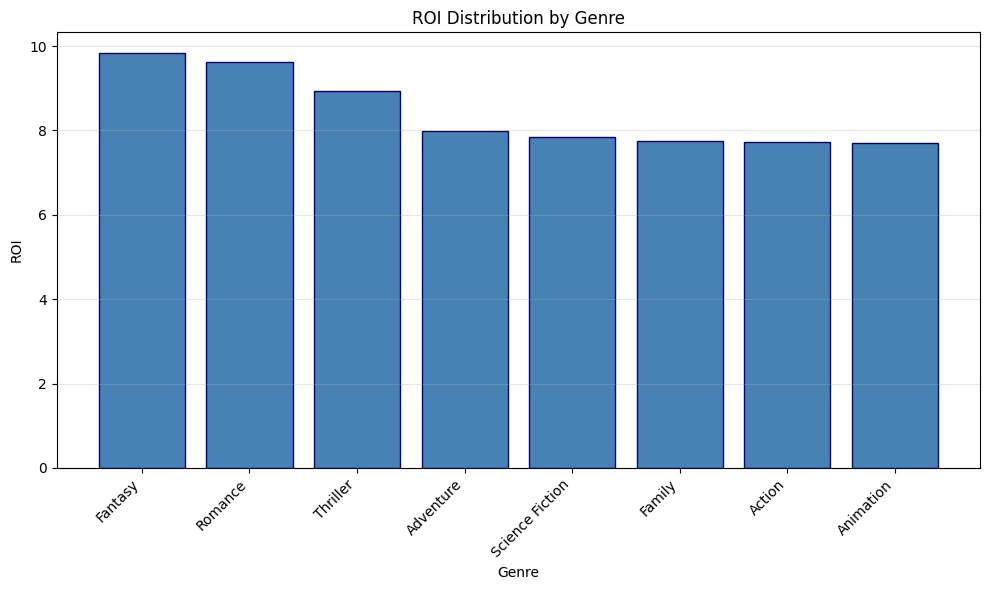

In [16]:
## RoI distribution by Genre

temp['roi'] = temp['revenue_musd'] / temp['budget_musd']

temp['genres_list'] = temp['genres'].str.split('|')
exploded = temp.explode('genres_list')

top_genres = exploded['genres_list'].value_counts().head(8).index.tolist()
genre_data = exploded[exploded['genres_list'].isin(top_genres)]

avg_roi = genre_data.groupby('genres_list')['roi'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(avg_roi.index, avg_roi.values, color='steelblue', edgecolor='navy')
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.title('ROI Distribution by Genre')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

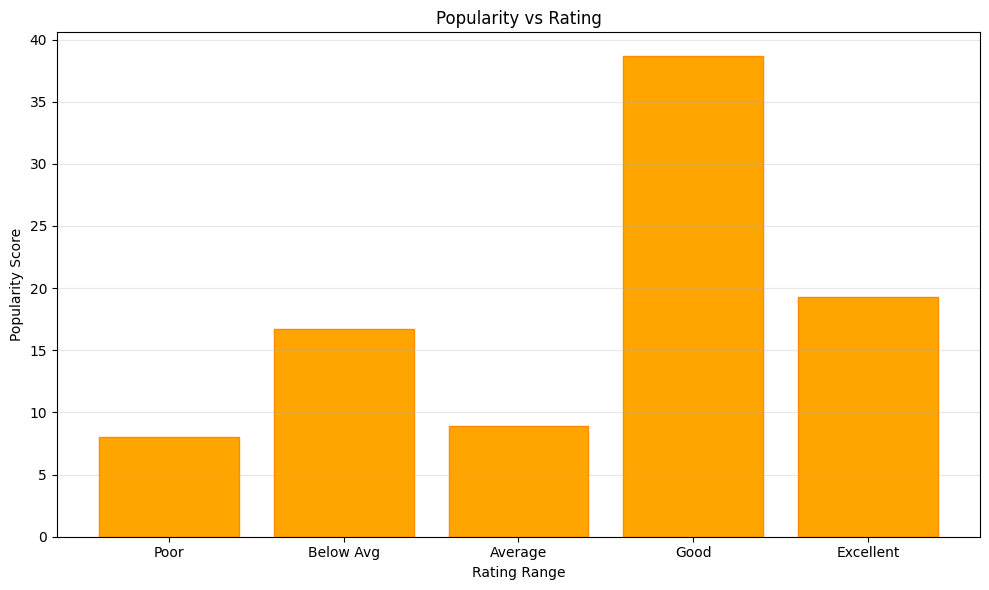

In [17]:

data = cleaned_df.dropna(subset=['popularity', 'vote_average']).copy()
data['rating_range'] = pd.cut(data['vote_average'], bins=5, labels=['Poor', 'Below Avg', 'Average', 'Good', 'Excellent'])

rating_pop = data.groupby('rating_range', observed=True).agg({
    'popularity': 'mean',
    'vote_average': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(rating_pop['rating_range'], rating_pop['popularity'], color='orange', edgecolor='darkorange')
plt.xlabel('Rating Range')
plt.ylabel('Popularity Score')
plt.title('Popularity vs Rating')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

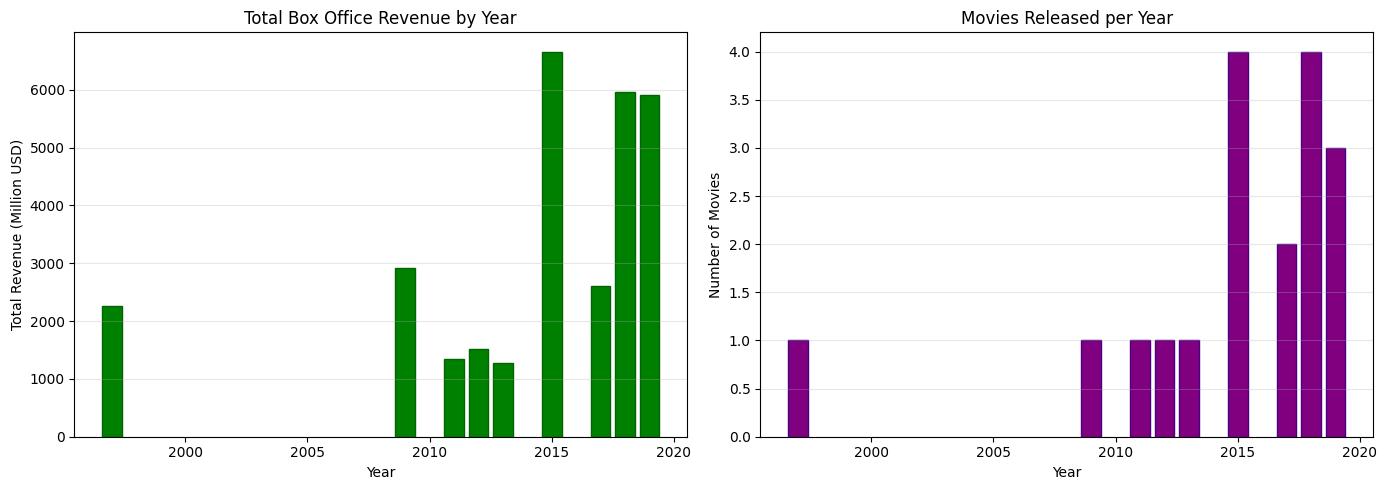

In [18]:


## Yearly Trends in Box Office Performance

temp = cleaned_df.dropna(subset=['release_date']).copy()
temp['year'] = pd.to_datetime(temp['release_date']).dt.year
temp = temp[(temp['year'] >= 1980) & (temp['year'] <= 2025)]

yearly = temp.groupby('year').agg({
    'revenue_musd': 'sum',
    'id': 'count'
}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(yearly['year'], yearly['revenue_musd'], color='green', edgecolor='darkgreen')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Revenue (Million USD)')
ax1.set_title('Total Box Office Revenue by Year')
ax1.grid(True, alpha=0.3, axis='y')

ax2.bar(yearly['year'], yearly['id'], color='purple', edgecolor='indigo')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Movies')
ax2.set_title('Movies Released per Year')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

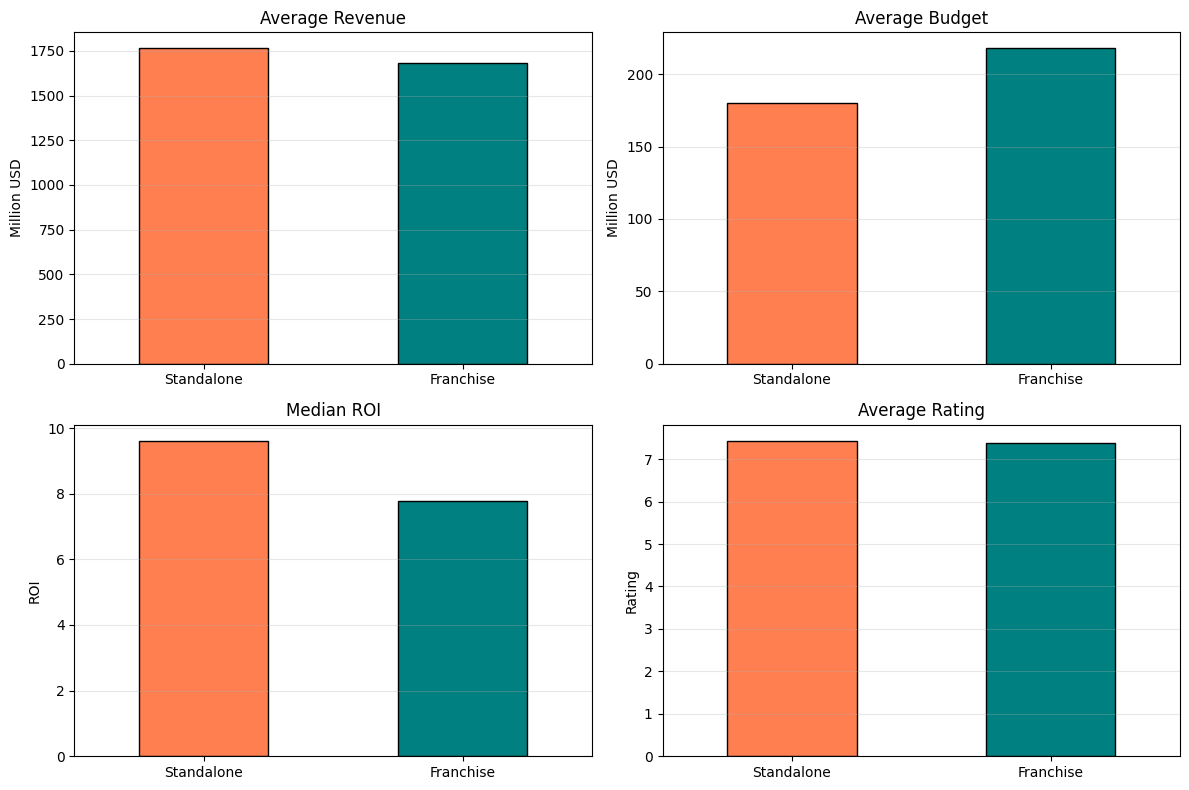

In [19]:
## Comparison of Franchise vs. Standalone Success

temp = cleaned_df.copy()
temp['is_franchise'] = temp['belongs_to_collection'].notna()
temp['roi'] = temp['revenue_musd'] / temp['budget_musd']

comparison = temp.groupby('is_franchise').agg({
    'revenue_musd': 'mean',
    'budget_musd': 'mean',
    'roi': 'median',
    'vote_average': 'mean'
})

comparison.index = ['Standalone', 'Franchise']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

comparison['revenue_musd'].plot(kind='bar', ax=axes[0, 0], color=['coral', 'teal'], edgecolor='black')
axes[0, 0].set_title('Average Revenue')
axes[0, 0].set_ylabel('Million USD')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

comparison['budget_musd'].plot(kind='bar', ax=axes[0, 1], color=['coral', 'teal'], edgecolor='black')
axes[0, 1].set_title('Average Budget')
axes[0, 1].set_ylabel('Million USD')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

comparison['roi'].plot(kind='bar', ax=axes[1, 0], color=['coral', 'teal'], edgecolor='black')
axes[1, 0].set_title('Median ROI')
axes[1, 0].set_ylabel('ROI')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

comparison['vote_average'].plot(kind='bar', ax=axes[1, 1], color=['coral', 'teal'], edgecolor='black')
axes[1, 1].set_title('Average Rating')
axes[1, 1].set_ylabel('Rating')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()